## Polynomial Regression

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
def create_polynomial_features(X, degree):
    m, n = X.shape
    poly_features = X.copy()
    for d in range(2, degree + 1):
        for i in range(n):
            for j in range(i, n):
                poly_features = np.column_stack((poly_features, X[:, i] ** (d - 1) * X[:, j]))
    return poly_features

In [6]:
def add_bias(X):
    return np.column_stack((np.ones((X.shape[0], 1)), X))

In [7]:
def polynomial_regression(X, y, degree=2):
    X_poly = create_polynomial_features(X, degree)
    X_poly = add_bias(X_poly)
    
    # normal equation: theta = (X'X)^(-1)X'y
    theta = np.linalg.inv(X_poly.T @ X_poly) @ X_poly.T @ y
    return theta, X_poly

In [12]:
def predict(X_poly, theta):
    return X_poly @ theta

In [14]:
def r_squared(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    return 1 - (ss_residual / ss_total)

In [16]:
train_file_path = 'polynomial_regression_train.csv'
train_data = pd.read_csv(train_file_path)

X_train = train_data[['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5']].values
y_train = train_data['Target'].values

In [30]:
degree = 5
theta, X_train_poly = polynomial_regression(X_train, y_train, degree)

In [32]:
y_train_pred = predict(X_train_poly, theta)

In [34]:
test_file_path = 'polynomial_regression_train.csv'
test_data = pd.read_csv(test_file_path)

X_test = test_data[['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5']].values

X_test_poly = create_polynomial_features(X_test, degree)
X_test_poly = add_bias(X_test_poly)
test_predictions = predict(X_test_poly, theta)

output = pd.DataFrame({
    'ID': test_data['ID'],
    'Predicted_Target': test_predictions
})
output_file_path = 'polynomial_regression_predictions.csv'
output.to_csv(output_file_path, index=False)

print(f"Predictions saved to {output_file_path}")

Predictions saved to polynomial_regression_predictions.csv


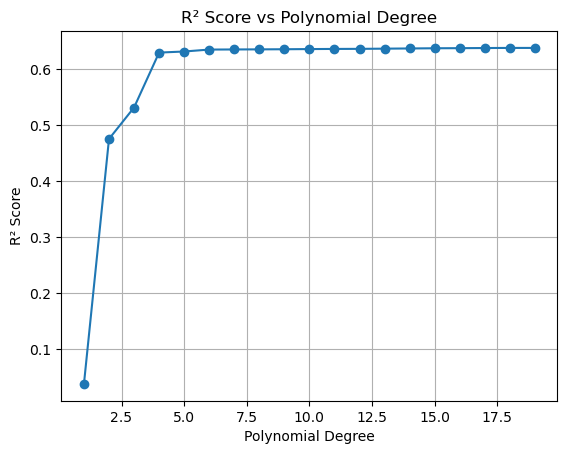

Best Polynomial Degree: 18


In [35]:
r2_scores = []

for degree in range(1, 20):
    theta, X_train_poly = polynomial_regression(X_train, y_train, degree)
    y_train_pred = predict(X_train_poly, theta)
    train_r2 = r_squared(y_train, y_train_pred)
    r2_scores.append(train_r2)

plt.plot(range(1, 20), r2_scores, marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('R² Score')
plt.title('R² Score vs Polynomial Degree')
plt.grid(True)
plt.show()

best_degree = np.argmax(r2_scores) + 1  
print(f"Best Polynomial Degree: {best_degree}")

In [37]:
train_r2 = r_squared(y_train, y_train_pred)
print(f"Training R² Score: {train_r2}")

Training R² Score: 0.637969366741973


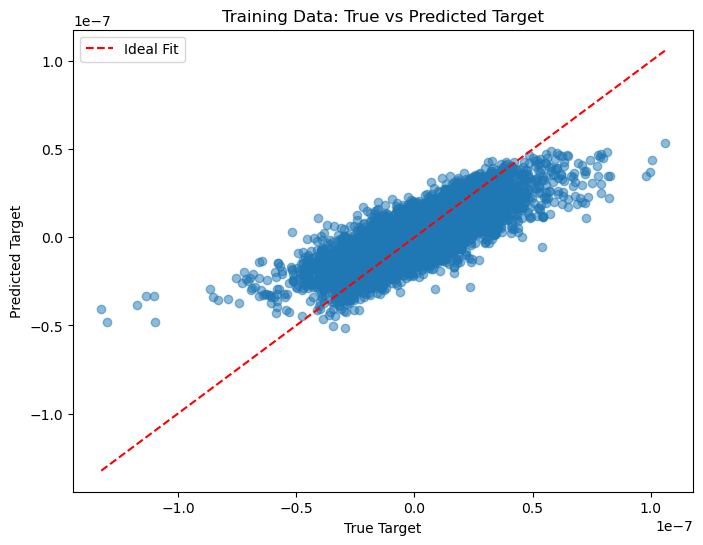

In [38]:
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', label='Ideal Fit')
plt.xlabel('True Target')
plt.ylabel('Predicted Target')
plt.title('Training Data: True vs Predicted Target')
plt.legend()
plt.show()